In [14]:
import pandas as pd

In [15]:
raw_data = pd.read_csv('WekinatorProject/saved/training02 copy.csv')
df = pd.DataFrame(raw_data)
df

,ID,'yyyy/MM/dd HH:mm:ss:SSS','Training round',inputs-1,inputs-2,inputs-3,outputs-1,outputs-2,outputs-3,outputs-4,outputs-5
0,630,'2023/06/12 00:36:07:882',14,1138.075317,3619.430664,6619.777832,1,0,0,0,0
1,631,'2023/06/12 00:36:08:052',14,1280.299683,4159.703613,6832.801270,1,0,0,0,0
2,632,'2023/06/12 00:36:08:313',14,513.609924,2263.796387,5328.227539,1,0,0,0,0
3,633,'2023/06/12 00:36:08:564',14,798.609985,5086.185059,7911.454102,1,0,0,0,0
4,634,'2023/06/12 00:36:08:825',14,847.363525,5363.515137,7919.514648,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
124,754,'2023/06/12 00:37:01:811',18,304.588745,3540.703369,7760.940430,0,0,0,0,1
125,755,'2023/06/12 00:37:02:067',18,305.591675,2771.258789,5594.006836,0,0,0,0,1
126,756,'2023/06/12 00:37:02:323',18,299.732941,3829.665283,7709.634766,0,0,0,0,1
127,757,'2023/06/12 00:37:02:579',18,310.425446,3343.871338,7520.071777,0,0,0,0,1


```
ID,'yyyy/MM/dd HH:mm:ss:SSS','Training round',inputs-1,inputs-2,inputs-3,outputs-1,outputs-2,outputs-3,outputs-4,outputs-5
```

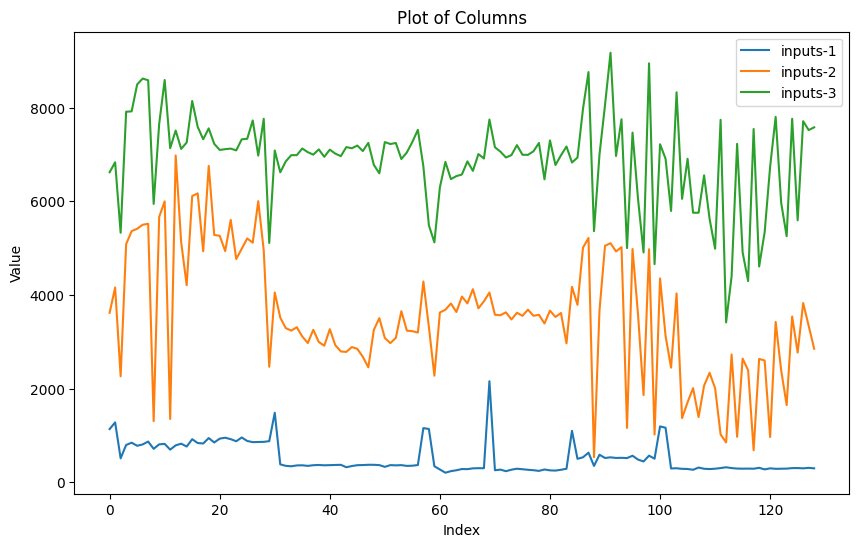

In [16]:
# Extract the columns of interest
columns = ['inputs-1', 'inputs-2', 'inputs-3']
data = df[columns]

# Set up the plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, dashes=False)

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Plot of Columns')

# Display the plot
plt.show()

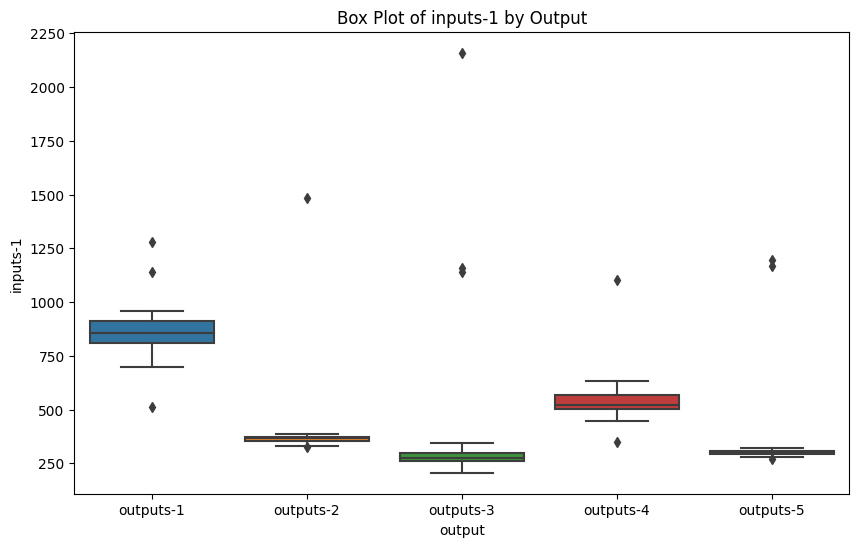

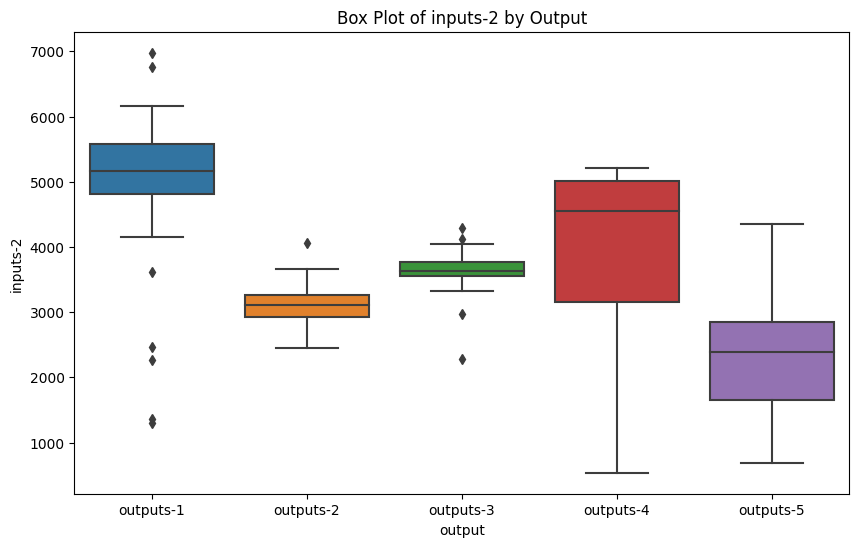

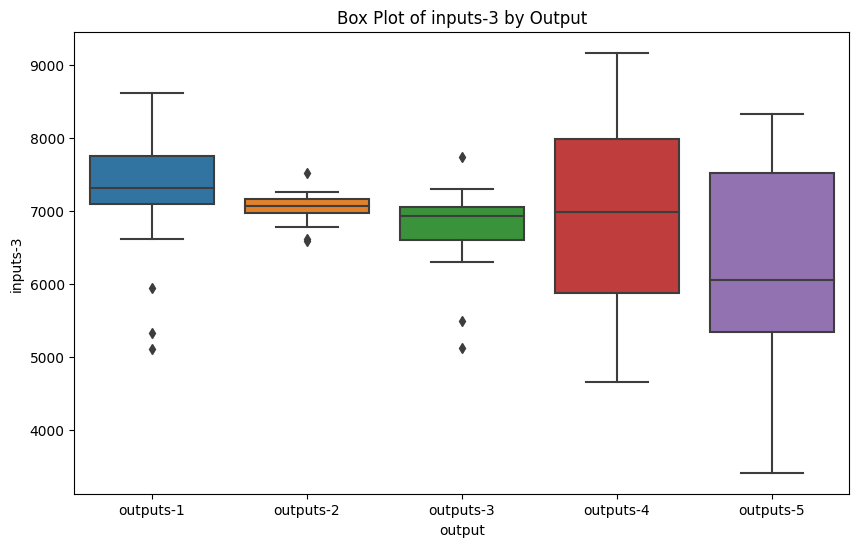

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the input and output column names
input_cols = ['inputs-1', 'inputs-2', 'inputs-3']
output_cols = ['outputs-1', 'outputs-2', 'outputs-3', 'outputs-4', 'outputs-5']

# Convert the output columns to long format for easier plotting
df_long = df.melt(id_vars=input_cols, value_vars=output_cols, var_name='output', value_name='value')

# Filter rows where output is 1
df_long = df_long[df_long['value'] == 1]

# Create a box plot for each input, broken down by output
for input_col in input_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='output', y=input_col, data=df_long)
    plt.title(f'Box Plot of {input_col} by Output')
    plt.show()


In [18]:
def moving_average(df, window_size):
    return df.rolling(window=window_size).mean()

# Define your window size
window_size = 3

# Apply the moving average filter to each input column
for col in ['inputs-1', 'inputs-2', 'inputs-3']:
    df[col+'_MA'] = moving_average(df[col], window_size)


In [19]:
# melt the dataframe to long format
df_long = pd.melt(df, id_vars=["ID", "'yyyy/MM/dd HH:mm:ss:SSS'", "'Training round'", "outputs-1", "outputs-2", "outputs-3", "outputs-4", "outputs-5"], 
                  value_vars=['inputs-1_MA', 'inputs-2_MA', 'inputs-3_MA'],
                  var_name='input', value_name='value')

# Combine output columns into one for easier handling
df_long['output'] = df_long[['outputs-1', 'outputs-2', 'outputs-3', 'outputs-4', 'outputs-5']].apply(lambda x: ''.join(x.values.astype(str)), axis=1)

In [20]:
mean_df = df_long[df_long['output'] == '1'].groupby('input')['value'].mean()
mean_df

Series([], Name: value, dtype: float64)

In [21]:
for output in ['outputs-1', 'outputs-2', 'outputs-3', 'outputs-4', 'outputs-5']:
    mean_df = df_long[df_long[output] == 1].groupby('input')['value'].mean()
    print(f"Mean values for {output} when it's 1:")
    print(mean_df)


Mean values for outputs-1 when it's 1:
input
inputs-1_MA     849.887801
inputs-2_MA    4965.011845
inputs-3_MA    7403.960868
Name: value, dtype: float64
Mean values for outputs-2 when it's 1:
input
inputs-1_MA     422.651461
inputs-2_MA    3134.553949
inputs-3_MA    7001.015999
Name: value, dtype: float64
Mean values for outputs-3 when it's 1:
input
inputs-1_MA     409.799532
inputs-2_MA    3616.275032
inputs-3_MA    6810.980216
Name: value, dtype: float64
Mean values for outputs-4 when it's 1:
input
inputs-1_MA     541.808533
inputs-2_MA    3808.584254
inputs-3_MA    7052.903870
Name: value, dtype: float64
Mean values for outputs-5 when it's 1:
input
inputs-1_MA     365.545089
inputs-2_MA    2327.657863
inputs-3_MA    6200.580578
Name: value, dtype: float64
